# Hotel Booking Cancallation Prediction

**Load Data**

Load Hotel_Booking/hotel_bookings.csv file provided on Brightspace.

In [453]:
# <<< Your code here >>>
import pandas as pd #importing the necessary libraries

In [454]:
hotel_df = pd.read_csv('./hotel_bookings.csv') #loading the data as a dataframe

In [455]:
hotel_df.head() #a quick check to see dataframe loaded properly

hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  children  babies  \
0                        0                     0       2       0.0       0   
1                        0                     0       2       0.0       0   
2                        0                     1       1       0.0       0   
3                        0                     1       1       0.0       0   
4                        0                     2       2       0.0       0   

  meal country market_segment distribution_channel  is_repeated_guest  \
0   BB     PRT         Direct               Direct                  0   
1   BB     PRT         Direct               Direct                  0   
2   BB     GBR         Direct               Direct                  0   
3   BB     GBR      Corporate            Corporate                  0   
4   BB     GBR      Online TA                TA/TO                  0   

   previous_cancellations  previous_bookings_not_canceled reserved_room_type  \
0                       0                               0                  C   
1                       0                               0                  C   
2                       0                               0                  A   
3                       0                               0                  A   
4                       0                               0                  A   

  assigned_room_type  booking_changes deposit_type  agent  company  \
0                  C                3   No Deposit    NaN      NaN   
1                  C                4   No Deposit    NaN      NaN   
2                  C                0   No Deposit    NaN      NaN   
3                  A                0   No Deposit  304.0      NaN   
4                  A                0   No Deposit  240.0      NaN   

   days_in_waiting_list customer_type   adr  required_car_parking_spaces  \
0                     0     Transient   0.0                            0   
1                     0     Transient   0.0                            0   
2                     0     Transient  75.0                            0   
3                     0     Transient  75.0                            0   
4                     0     Transient  98.0                            0   

   total_of_special_requests reservation_status reservation_status_date  
0                          0          Check-Out              2015-07-01  
1                          0          Check-Out              2015-07-01  
2                          0          Check-Out              2015-07-02  
3                          0          Check-Out              2015-07-02  
4                          1          Check-Out              2015-07-03

# 1. Data Pre-processing (25%)


---






**Drop irrelevant columns**

It will significantly reduce the time and effort you need to invest. As a general guideline, columns containing IDs, dates, or irrelevant information are typically considered redundant and offer little value for predictive analysis.

In [456]:
# <<< Your code here >>>
# correlation analysis
correlation_matrix = hotel_df.corr()
print(correlation_matrix)

                                is_canceled  lead_time  arrival_date_year  \
is_canceled                        1.000000   0.293123           0.016660   
lead_time                          0.293123   1.000000           0.040142   
arrival_date_year                  0.016660   0.040142           1.000000   
arrival_date_week_number           0.008148   0.126871          -0.540561   
arrival_date_day_of_month         -0.006130   0.002268          -0.000221   
stays_in_weekend_nights           -0.001791   0.085671           0.021497   
stays_in_week_nights               0.024765   0.165799           0.030883   
adults                             0.060017   0.119519           0.029635   
children                           0.005048  -0.037622           0.054624   
babies                            -0.032491  -0.020915          -0.013192   
is_repeated_guest                 -0.084793  -0.124410           0.010341   
previous_cancellations             0.110133   0.086042          -0.119822   

Considering all the correlations of different columns with is_cancelled, i decided to remove the following irrelevant columns.

In [457]:
remove_columns = [
    'arrival_date_year',
    'arrival_date_week_number',
    'arrival_date_day_of_month',
    'days_in_waiting_list',
    'company',
    'agent',
    'required_car_parking_spaces'
    ]
#above are the columns ill be removing

#storing the cleaned dataframe into another variable
hotel_df_cleaned = hotel_df.drop(columns=remove_columns) 

hotel_df_cleaned.head()

hotel  is_canceled  lead_time arrival_date_month  \
0  Resort Hotel            0        342               July   
1  Resort Hotel            0        737               July   
2  Resort Hotel            0          7               July   
3  Resort Hotel            0         13               July   
4  Resort Hotel            0         14               July   

   stays_in_weekend_nights  stays_in_week_nights  adults  children  babies  \
0                        0                     0       2       0.0       0   
1                        0                     0       2       0.0       0   
2                        0                     1       1       0.0       0   
3                        0                     1       1       0.0       0   
4                        0                     2       2       0.0       0   

  meal country market_segment distribution_channel  is_repeated_guest  \
0   BB     PRT         Direct               Direct                  0   
1   BB     PRT         Direct               Direct                  0   
2   BB     GBR         Direct               Direct                  0   
3   BB     GBR      Corporate            Corporate                  0   
4   BB     GBR      Online TA                TA/TO                  0   

   previous_cancellations  previous_bookings_not_canceled reserved_room_type  \
0                       0                               0                  C   
1                       0                               0                  C   
2                       0                               0                  A   
3                       0                               0                  A   
4                       0                               0                  A   

  assigned_room_type  booking_changes deposit_type customer_type   adr  \
0                  C                3   No Deposit     Transient   0.0   
1                  C                4   No Deposit     Transient   0.0   
2                  C                0   No Deposit     Transient  75.0   
3                  A                0   No Deposit     Transient  75.0   
4                  A                0   No Deposit     Transient  98.0   

   total_of_special_requests reservation_status reservation_status_date  
0                          0          Check-Out              2015-07-01  
1                          0          Check-Out              2015-07-01  
2                          0          Check-Out              2015-07-02  
3                          0          Check-Out              2015-07-02  
4                          1          Check-Out              2015-07-03

In [458]:
#check for unqiue values to look for similarities
unique_babies = hotel_df_cleaned['babies'].unique()
unique_children = hotel_df_cleaned['children'].unique() 

print(f"the value for babies is {unique_babies} \n \n the value for children is {unique_children}")

the value for babies is [ 0  1  2 10  9] 
 
 the value for children is [ 0.  1.  2. 10.  3. nan]


I noticed that there is a babies and children column. Identifying the unique values in both columns to see if they are similar. Different and some similar values so decided to keep these columns. However, children has some nan values.

## 1.1 Missing Values (10%)

Identify and handle missing values.

In [459]:
# <<< Your code here >>>
# Checking to see the number of Nan values in the children column.
print(f"Number of NaN values in children column is: {hotel_df_cleaned['children'].isna().sum()} out of total values : {hotel_df_cleaned['children'].sum()}")

Number of NaN values in children column is: 4 out of total values : 12403.0


In [460]:
# Remove rows with NaN values in the 'children' column
hotel_df_cleaned = hotel_df_cleaned.dropna(subset=['children'])

# Verify the change
print(f"Number of remaining rows after removing NaN values in children: {hotel_df_cleaned.shape[0]}")


Number of remaining rows after removing NaN values in children: 119386


In [461]:
# Check for missing values in other columns

missing_values = hotel_df_cleaned.isna().sum()
print(f"Missing values in each column: {missing_values}")

Missing values in each column: hotel                               0
is_canceled                         0
lead_time                           0
arrival_date_month                  0
stays_in_weekend_nights             0
stays_in_week_nights                0
adults                              0
children                            0
babies                              0
meal                                0
country                           488
market_segment                      0
distribution_channel                0
is_repeated_guest                   0
previous_cancellations              0
previous_bookings_not_canceled      0
reserved_room_type                  0
assigned_room_type                  0
booking_changes                     0
deposit_type                        0
customer_type                       0
adr                                 0
total_of_special_requests           0
reservation_status                  0
reservation_status_date             0
dtype: int64


Output suggests that i only need to look at the values in the country column and decide what i want to do with the missing values.

In [462]:
print(f"{hotel_df_cleaned['country'].count()}") # Looking at the number of values in the country column

118898


Better to drop as we are not gonna be losing alot of data and it will ensure that the data we will be working on is complete.

In [463]:
# Drop rows with NaN in the 'country' column
hotel_df_cleaned = hotel_df_cleaned.dropna(subset=['country'])

## Unique values

Find out unique values in columns. This will help you in identifying in-consistent data.

In [464]:
# <<< Your code here >>>
# Look at all the unique values in the dataFrame

for column in hotel_df_cleaned.columns:
    unique_values = hotel_df_cleaned[column].unique()
    print(f"Unique values in '{column}': {unique_values}")

Unique values in 'hotel': ['Resort Hotel' 'City Hotel']
Unique values in 'is_canceled': [0 1]
Unique values in 'lead_time': [342 737   7  13  14   0   9  85  75  23  35  68  18  37  12  72 127  78
  48  60  77  99  95  96  69  45  40  15  36  43  70  16 107  47 113  90
  50  93  76   3   1  10   5  17  51  71  63  62 101   2  81 368 364 324
  79  21 109 102   4  98  92  26  73 115  86  52  29  30  33  32   8 100
  44  80  97  64  39  34  27  82  94 110 111  84  66 104  28 258 112  65
  67  55  88  54 292  83 105 280 394  24 103 366 249  22  91  11 108 106
  31  87  41 304 117  59  53  58 116  42 321  38 118  56  49 317   6  57
  19  25 315 123  46  89  61 312 299 130  74 298 119  20 286 136 129 124
 327 131 460 140 114 139 122 137 126 120 128 135 150 143 151 132 125 157
 147 138 156 164 346 159 160 161 333 381 149 154 297 163 314 155 323 340
 356 142 328 144 336 248 302 175 344 382 146 170 166 338 167 310 148 165
 172 171 145 121 178 305 173 152 354 347 158 185 349 183 352 177 200 192


From the output i can see some values that need verifying. Like the children and babies values are high sometimes being '10' and some adult values being as high as '55'. Some adr values are also 0 which need checking as this suggests missing data or free stays.

Some values are undefinied for 'distribution_channel' and 'meal'. We need to change them.

## 1.2 Removing Inconsistent values and Outliers (10%)

Detecting inconsistencies can be achieved through a variety of methods. Some can be identified by examining unique values within each column, while others may require a solid understanding of the problem domain. Since you might not be an expert in the hotel or hospitality industry, here are some helpful hints:

Hints:

1. Check for incomplete bookings, such as reservations with zero adults, babies, or children.
2. Examine rows with zeros in both 'stays_in_weekend_nights' and 'stays_in_week_nights.'



-----------------------------------------------------------------------
First im gonna focus on the inconsistencies that i identified above.

In [465]:
mode_channel = hotel_df_cleaned['distribution_channel'].mode().iloc[0]
mode_meal = hotel_df_cleaned['meal'].mode().iloc[0]
print(f"Most common distrubution channel is: {mode_channel} \n \n Most common meal is: {mode_meal}")

hotel_df_cleaned['distribution_channel'] = hotel_df_cleaned['distribution_channel'].replace('Undefined', mode_channel)
hotel_df_cleaned['meal'] = hotel_df_cleaned['meal'].replace('Undefined', mode_meal)

Most common distrubution channel is: TA/TO 
 
 Most common meal is: BB


In [466]:
# <<< Your code here >>>
unusual_babies = hotel_df_cleaned[hotel_df_cleaned['babies'] >= 2]  # Adjust threshold as necessary
print(unusual_babies)

unusual_children = hotel_df_cleaned[hotel_df_cleaned['children'] >= 4]
print(unusual_children)

               hotel  is_canceled  lead_time arrival_date_month  \
264     Resort Hotel            0         21               July   
6719    Resort Hotel            1        116               June   
7896    Resort Hotel            1        345          September   
16677   Resort Hotel            0        174          September   
29906   Resort Hotel            0         47           November   
33332   Resort Hotel            0         31           February   
37302   Resort Hotel            0          1               June   
39634   Resort Hotel            0        247             August   
46619     City Hotel            0         37            January   
78656     City Hotel            0         11            October   
84429     City Hotel            0          1           February   
84591     City Hotel            0          4           February   
94063     City Hotel            0          4               July   
97901     City Hotel            0         11          Septembe

Since the outliers in children and babies on occur once or twice. It is better to remove those data entry points to the dataset clean and more representative of typical bookings.

In [467]:
# Define outliers for babies and children
babies_outliers = hotel_df_cleaned[hotel_df_cleaned['babies'].isin([9, 10])]
children_outliers = hotel_df_cleaned[hotel_df_cleaned['children'] == 10]

# Remove the outliers from the dataset
hotel_df_cleaned = hotel_df_cleaned.drop(babies_outliers.index).drop(children_outliers.index)


This has removed the outliers in those columns.
Just to check it has been done properly.

In [468]:
print(f"Babies: {hotel_df_cleaned['babies'].unique()} and Children: {hotel_df_cleaned['children'].unique()}")

Babies: [0 1 2] and Children: [0. 1. 2. 3.]


Looks good. Lets now have a look at the adult column.

In [469]:
unusual_adults = hotel_df_cleaned[hotel_df_cleaned['adults'] >= 20]  # Adjust threshold as necessary
print(unusual_adults)

             hotel  is_canceled  lead_time arrival_date_month  \
1539  Resort Hotel            1        304          September   
1587  Resort Hotel            1        333          September   
1643  Resort Hotel            1        336          September   
1752  Resort Hotel            1        340          September   
1884  Resort Hotel            1        347          September   
1917  Resort Hotel            1        349          September   
1962  Resort Hotel            1        352          September   
2003  Resort Hotel            1        354          September   
2164  Resort Hotel            1        361            October   
2173  Resort Hotel            1        338            October   
2228  Resort Hotel            1        328            October   
2418  Resort Hotel            1        334            October   

      stays_in_weekend_nights  stays_in_week_nights  adults  children  babies  \
1539                        0                     3      40       0.0    

All entries are from Resort Hotel and suggest that these could genuinely be large group of people booking.
This can suggest that people came in as groups for like an event which got cancelled.
I will assign the higher values into their own group categories.

In [470]:
def classify_group(size):
    if size == 1:
        return 'Single'
    elif size == 2:
        return 'Couple'
    elif 5 <= size <= 10:
        return 'Small Sized Group'
    elif 11 <= size <= 30:
        return 'Medium Sized Group'
    elif size > 30:
        return 'Large Sized Group'
    else:
        return 'Other'

In [471]:
hotel_df_cleaned['group_category'] = hotel_df_cleaned['adults'].apply(classify_group)
hotel_df_cleaned.head()

hotel  is_canceled  lead_time arrival_date_month  \
0  Resort Hotel            0        342               July   
1  Resort Hotel            0        737               July   
2  Resort Hotel            0          7               July   
3  Resort Hotel            0         13               July   
4  Resort Hotel            0         14               July   

   stays_in_weekend_nights  stays_in_week_nights  adults  children  babies  \
0                        0                     0       2       0.0       0   
1                        0                     0       2       0.0       0   
2                        0                     1       1       0.0       0   
3                        0                     1       1       0.0       0   
4                        0                     2       2       0.0       0   

  meal country market_segment distribution_channel  is_repeated_guest  \
0   BB     PRT         Direct               Direct                  0   
1   BB     PRT         Direct               Direct                  0   
2   BB     GBR         Direct               Direct                  0   
3   BB     GBR      Corporate            Corporate                  0   
4   BB     GBR      Online TA                TA/TO                  0   

   previous_cancellations  previous_bookings_not_canceled reserved_room_type  \
0                       0                               0                  C   
1                       0                               0                  C   
2                       0                               0                  A   
3                       0                               0                  A   
4                       0                               0                  A   

  assigned_room_type  booking_changes deposit_type customer_type   adr  \
0                  C                3   No Deposit     Transient   0.0   
1                  C                4   No Deposit     Transient   0.0   
2                  C                0   No Deposit     Transient  75.0   
3                  A                0   No Deposit     Transient  75.0   
4                  A                0   No Deposit     Transient  98.0   

   total_of_special_requests reservation_status reservation_status_date  \
0                          0          Check-Out              2015-07-01   
1                          0          Check-Out              2015-07-01   
2                          0          Check-Out              2015-07-02   
3                          0          Check-Out              2015-07-02   
4                          1          Check-Out              2015-07-03   

  group_category  
0         Couple  
1         Couple  
2         Single  
3         Single  
4         Couple

In [472]:
category_counts = hotel_df_cleaned['group_category'].value_counts()
print(category_counts)

Couple                89493
Single                22734
Other                  6652
Medium Sized Group        9
Small Sized Group         4
Large Sized Group         3
Name: group_category, dtype: int64


Now lets take a look at incomplete bookings.

In [473]:
incomplete_bookings = hotel_df_cleaned[(hotel_df_cleaned['adults'] == 0) & (hotel_df_cleaned['children'] == 0) & (hotel_df_cleaned['babies'] == 0)]
print(incomplete_bookings)
print(incomplete_bookings.value_counts())

               hotel  is_canceled  lead_time arrival_date_month  \
2224    Resort Hotel            0          1            October   
2409    Resort Hotel            0          0            October   
3181    Resort Hotel            0         36           November   
3684    Resort Hotel            0        165           December   
3708    Resort Hotel            0        165           December   
...              ...          ...        ...                ...   
115029    City Hotel            0        107               June   
115091    City Hotel            0          1               June   
116251    City Hotel            0         44               July   
116534    City Hotel            0          2               July   
117087    City Hotel            0        170               July   

        stays_in_weekend_nights  stays_in_week_nights  adults  children  \
2224                          0                     3       0       0.0   
2409                          0              

In [474]:
hotel_df_cleaned['incomplete_bookings'] = (hotel_df_cleaned['adults'] == 0) & (hotel_df_cleaned['children'] == 0) & (hotel_df_cleaned['babies'] == 0) & (hotel_df_cleaned['reservation_status'] == 'Check-Out')
hotel_df_cleaned = hotel_df_cleaned[~hotel_df_cleaned['incomplete_bookings']]

In [475]:

remaining_flags = hotel_df_cleaned[hotel_df_cleaned['incomplete_bookings']]
print(remaining_flags)


Empty DataFrame
Columns: [hotel, is_canceled, lead_time, arrival_date_month, stays_in_weekend_nights, stays_in_week_nights, adults, children, babies, meal, country, market_segment, distribution_channel, is_repeated_guest, previous_cancellations, previous_bookings_not_canceled, reserved_room_type, assigned_room_type, booking_changes, deposit_type, customer_type, adr, total_of_special_requests, reservation_status, reservation_status_date, group_category, incomplete_bookings]
Index: []


Now lets see where there are no stays in weekend and week nights.

In [476]:
zero_stays = hotel_df_cleaned[(hotel_df_cleaned['stays_in_week_nights'] == 0) & (hotel_df_cleaned['stays_in_weekend_nights'] == 0)]
print(zero_stays)
print(zero_stays.value_counts())
hotel_df_cleaned['no_stays'] = (hotel_df_cleaned['stays_in_week_nights'] == 0) & (hotel_df_cleaned['stays_in_weekend_nights'] == 0)


               hotel  is_canceled  lead_time arrival_date_month  \
0       Resort Hotel            0        342               July   
1       Resort Hotel            0        737               July   
167     Resort Hotel            0        111               July   
168     Resort Hotel            0          0               July   
196     Resort Hotel            0          8               July   
...              ...          ...        ...                ...   
115483    City Hotel            0         15               July   
117701    City Hotel            0          0             August   
118029    City Hotel            0          0             August   
118631    City Hotel            0         78             August   
118963    City Hotel            0          1             August   

        stays_in_weekend_nights  stays_in_week_nights  adults  children  \
0                             0                     0       2       0.0   
1                             0              

There are 586 entries that have 0 night stayed in week and weekends. This is a significant amount of data which could help imrpove the model. Removing all of this data could cause the model to not perform as well with real data once the model is deployed.

I can remove all entries that have no nights on week and weekends, and the customer eithered checked out or didn't show up. By flagging the ones that had no stay and were cancelled. I can use them to improve model on better cancellation patterns.

In [477]:
# Define the condition for no stays and specific reservation statuses
no_stay_condition = (hotel_df_cleaned['stays_in_week_nights'] == 0) & (hotel_df_cleaned['stays_in_weekend_nights'] == 0)
relevant_status = (hotel_df_cleaned['reservation_status'] == 'Check-Out') | (hotel_df_cleaned['reservation_status'] == 'No-Show')

# Remove these entries from the DataFrame
hotel_df_cleaned = hotel_df_cleaned[~(no_stay_condition & relevant_status)]

hotel_df_cleaned.head()


hotel  is_canceled  lead_time arrival_date_month  \
2  Resort Hotel            0          7               July   
3  Resort Hotel            0         13               July   
4  Resort Hotel            0         14               July   
5  Resort Hotel            0         14               July   
6  Resort Hotel            0          0               July   

   stays_in_weekend_nights  stays_in_week_nights  adults  children  babies  \
2                        0                     1       1       0.0       0   
3                        0                     1       1       0.0       0   
4                        0                     2       2       0.0       0   
5                        0                     2       2       0.0       0   
6                        0                     2       2       0.0       0   

  meal country market_segment distribution_channel  is_repeated_guest  \
2   BB     GBR         Direct               Direct                  0   
3   BB     GBR      Corporate            Corporate                  0   
4   BB     GBR      Online TA                TA/TO                  0   
5   BB     GBR      Online TA                TA/TO                  0   
6   BB     PRT         Direct               Direct                  0   

   previous_cancellations  previous_bookings_not_canceled reserved_room_type  \
2                       0                               0                  A   
3                       0                               0                  A   
4                       0                               0                  A   
5                       0                               0                  A   
6                       0                               0                  C   

  assigned_room_type  booking_changes deposit_type customer_type    adr  \
2                  C                0   No Deposit     Transient   75.0   
3                  A                0   No Deposit     Transient   75.0   
4                  A                0   No Deposit     Transient   98.0   
5                  A                0   No Deposit     Transient   98.0   
6                  C                0   No Deposit     Transient  107.0   

   total_of_special_requests reservation_status reservation_status_date  \
2                          0          Check-Out              2015-07-02   
3                          0          Check-Out              2015-07-02   
4                          1          Check-Out              2015-07-03   
5                          1          Check-Out              2015-07-03   
6                          0          Check-Out              2015-07-03   

  group_category  incomplete_bookings  no_stays  
2         Single                False     False  
3         Single                False     False  
4         Couple                False     False  
5         Couple                False     False  
6         Couple                False     False

However, there are still entries 

## 1.3 Column data type conversion (5%)

All necessary columns should be correctly converted to appropriate data types.


In [478]:
# <<< Your code here >>>
print(hotel_df_cleaned.dtypes)

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_month                 object
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
customer_type                      object
adr                               float64
total_of_special_requests           int64
reservation_status                

The more clearer ones that need changing are the reservation_status_date and children.

However, there are many object types can be changed to caterogries to help improve speed and make the code more memory-efficient.

In [479]:
hotel_df_cleaned['children'] = hotel_df_cleaned['children'].astype('int64')
hotel_df_cleaned['reservation_status_date'] = pd.to_datetime(hotel_df_cleaned['reservation_status_date'])

categorical_columns = [
    'hotel', 'meal', 'country', 'market_segment', 'distribution_channel', 
    'reserved_room_type', 'assigned_room_type', 'deposit_type', 
    'customer_type', 'reservation_status', 'group_category'
]
for col in categorical_columns:
    hotel_df_cleaned[col] = hotel_df_cleaned[col].astype('category')

In [480]:
print(hotel_df_cleaned.dtypes)

hotel                                   category
is_canceled                                int64
lead_time                                  int64
arrival_date_month                        object
stays_in_weekend_nights                    int64
stays_in_week_nights                       int64
adults                                     int64
children                                   int64
babies                                     int64
meal                                    category
country                                 category
market_segment                          category
distribution_channel                    category
is_repeated_guest                          int64
previous_cancellations                     int64
previous_bookings_not_canceled             int64
reserved_room_type                      category
assigned_room_type                      category
booking_changes                            int64
deposit_type                            category
customer_type       

# 2. Exploratory Data Analysis (25%)


---





You've also been provided with examples of valuable insights that could be of interest to hotel management, including:

* Calculating cancellation percentages for City and Resort hotels.
* Identifying the most frequently ordered meal types.
* Determining the number of returning guests.
* Discovering the most booked room types.
* Exploring correlations between room types and cancellations.


Visualize these insights using three different types of visualizations covered in the practicals, such as:

* Bar graphs
* Pie charts
* Line charts
* Heatmaps

## 2.1. Calculating cancellation percentages for City and Resort hotels.

hotel
City Hotel      41.913610
Resort Hotel    28.231154
Name: is_canceled, dtype: float64


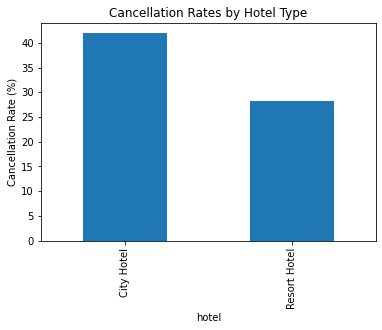

In [481]:
# <<< Your code here >>>
import matplotlib.pyplot as plt

cancellation_rates = hotel_df_cleaned.groupby('hotel')['is_canceled'].mean() * 100
print(cancellation_rates)

cancellation_rates.plot(kind='bar', title='Cancellation Rates by Hotel Type', ylabel='Cancellation Rate (%)')
plt.show()


## 2.2. Identifying the most frequently ordered meal types.

BB    92445
HB    14356
SC    10512
FB      797
Name: meal, dtype: int64


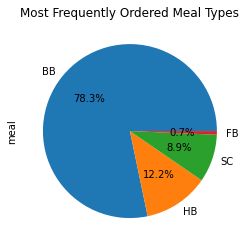

In [482]:
# <<< Your code here >>>
meal_counts = hotel_df_cleaned['meal'].value_counts()
print(meal_counts)

meal_counts.plot(kind='pie', title='Most Frequently Ordered Meal Types', autopct='%1.1f%%')
plt.show()


## 2.3. Determining the number of returning guests.

Number of returning guests: 3498


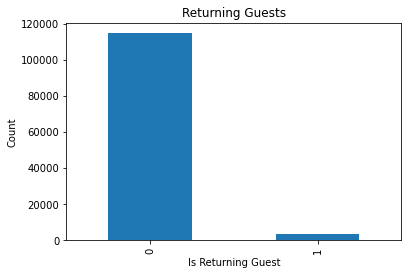

In [483]:
# <<< Your code here >>>
returning_guests = hotel_df_cleaned['is_repeated_guest'].sum()
print(f'Number of returning guests: {returning_guests}')
returning_guest_counts = hotel_df_cleaned['is_repeated_guest'].value_counts()
returning_guest_counts.plot(kind='bar', title='Returning Guests', xlabel='Is Returning Guest', ylabel='Count')
plt.show()


## 2.4. Discovering the most booked room types.

A    85021
D    19068
E     6451
F     2872
G     2063
B     1107
C      923
H      597
L        6
P        2
Name: reserved_room_type, dtype: int64


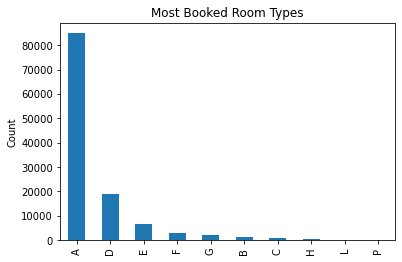

In [484]:
# <<< Your code here >>>
room_type_counts = hotel_df_cleaned['reserved_room_type'].value_counts()
print(room_type_counts)
room_type_counts.plot(kind='bar', title='Most Booked Room Types', ylabel='Count')
plt.show()


## 2.5. Exploring correlations between room types and cancellations.

                      is_canceled  reserved_room_type_A  reserved_room_type_B  \
is_canceled              1.000000              0.069942             -0.009026   
reserved_room_type_A     0.069942              1.000000             -0.155918   
reserved_room_type_B    -0.009026             -0.155918              1.000000   
reserved_room_type_C    -0.007341             -0.142260             -0.008632   
reserved_room_type_D    -0.048892             -0.703338             -0.042679   
reserved_room_type_E    -0.038648             -0.385290             -0.023380   
reserved_room_type_F    -0.021962             -0.253055             -0.015356   
reserved_room_type_G    -0.001064             -0.213724             -0.012969   
reserved_room_type_H     0.005403             -0.114252             -0.006933   
reserved_room_type_L    -0.000595             -0.011425             -0.000693   
reserved_room_type_P     0.005327             -0.006596             -0.000400   

                      reser

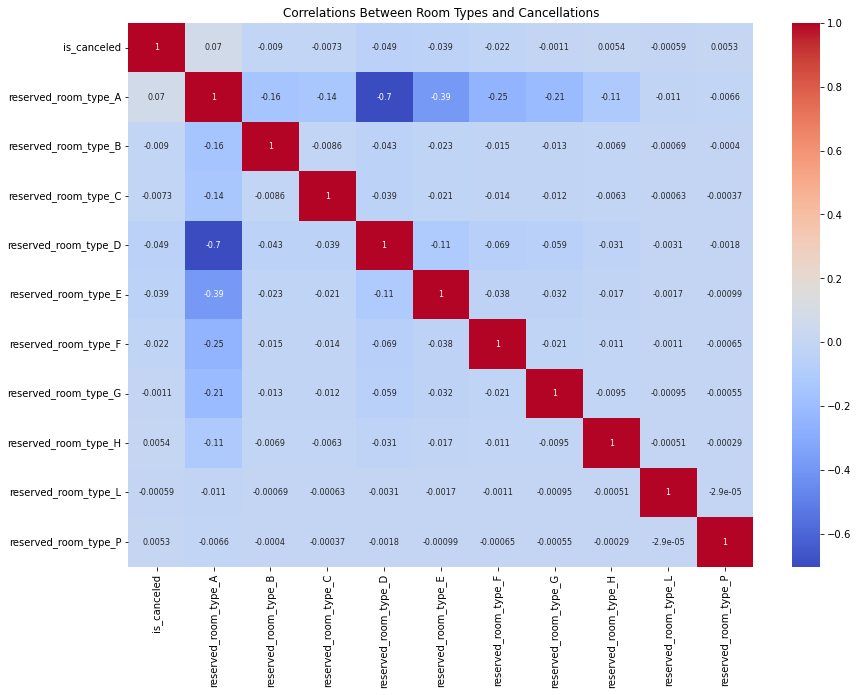

In [485]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the correlation matrix
corr_matrix = hotel_df_cleaned[['reserved_room_type', 'is_canceled']].copy()
corr_matrix = pd.get_dummies(corr_matrix, columns=['reserved_room_type'])
correlations = corr_matrix.corr()

# Print the correlation matrix
print(correlations)

# Create a larger figure with smaller annotation font size
plt.figure(figsize=(14, 10))
sns.heatmap(correlations, annot=True, cmap='coolwarm', annot_kws={"size": 8})

# Add title
plt.title('Correlations Between Room Types and Cancellations')
plt.show()


# 3. Feature Engineering (20%)


---





Apply various feature engineering techniques, covered in the lectures and practicals.

Hint:
* Binning
* Encoding
* Scaling
* Feature selection

## 3.1. Binning

In [486]:
# <<< Your code here >>>
# Define a mapping for months to seasons
season_mapping = {
    'January': 'Winter', 'February': 'Winter', 'March': 'Spring',
    'April': 'Spring', 'May': 'Spring', 'June': 'Summer',
    'July': 'Summer', 'August': 'Summer', 'September': 'Autumn',
    'October': 'Autumn', 'November': 'Autumn', 'December': 'Winter'
}

# Map the 'arrival_date_month' column to seasons
hotel_df_cleaned['arrival_season'] = hotel_df_cleaned['arrival_date_month'].map(season_mapping)

## 3.2. Encoding

In [487]:
# <<< Your code here >>>
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Encoding the entire dataset before splitting

# Apply cat codes for 'reserved_room_type', 'assigned_room_type', 'arrival_date_month'
hotel_df_cleaned['reserved_room_type_encoded'] = hotel_df_cleaned['reserved_room_type'].astype('category').cat.codes
hotel_df_cleaned['assigned_room_type_encoded'] = hotel_df_cleaned['assigned_room_type'].astype('category').cat.codes

# Use categorical codes for the 'arrival_season' column
hotel_df_cleaned['arrival_season_encoded'] = hotel_df_cleaned['arrival_season'].astype('category').cat.codes


# Apply one-hot encoding for categorical variables with fewer unique values
hotel_df_cleaned = pd.get_dummies(hotel_df_cleaned, columns=['meal', 'customer_type'], drop_first=True)

# Ordinal encoding for 'group_category' and 'deposit_type'
group_category_order = ['Other', 'Single', 'Couple', 'Small Sized Group', 'Medium Sized Group', 'Large Sized Group']
group_category_encoder = OrdinalEncoder(categories=[group_category_order])
hotel_df_cleaned['group_category_encoded'] = group_category_encoder.fit_transform(hotel_df_cleaned[['group_category']])

deposit_type_order = [['No Deposit', 'Refundable', 'Non Refund']]
deposit_type_encoder = OrdinalEncoder(categories=deposit_type_order)
hotel_df_cleaned['deposit_type_encoded'] = deposit_type_encoder.fit_transform(hotel_df_cleaned[['deposit_type']])

# Binary encoding for 'hotel'
hotel_df_cleaned['hotel_encoded'] = hotel_df_cleaned['hotel'].apply(lambda x: 1 if x == 'Resort Hotel' else 0)

# Target encoding for 'country'
y = hotel_df_cleaned['is_canceled']
country_mean = y.groupby(hotel_df_cleaned['country']).mean()
hotel_df_cleaned['country_encoded'] = hotel_df_cleaned['country'].map(country_mean)


In [488]:
hotel_df_cleaned.head()

hotel  is_canceled  lead_time arrival_date_month  \
2  Resort Hotel            0          7               July   
3  Resort Hotel            0         13               July   
4  Resort Hotel            0         14               July   
5  Resort Hotel            0         14               July   
6  Resort Hotel            0          0               July   

   stays_in_weekend_nights  stays_in_week_nights  adults  children  babies  \
2                        0                     1       1         0       0   
3                        0                     1       1         0       0   
4                        0                     2       2         0       0   
5                        0                     2       2         0       0   
6                        0                     2       2         0       0   

  country market_segment distribution_channel  is_repeated_guest  \
2     GBR         Direct               Direct                  0   
3     GBR      Corporate            Corporate                  0   
4     GBR      Online TA                TA/TO                  0   
5     GBR      Online TA                TA/TO                  0   
6     PRT         Direct               Direct                  0   

   previous_cancellations  previous_bookings_not_canceled reserved_room_type  \
2                       0                               0                  A   
3                       0                               0                  A   
4                       0                               0                  A   
5                       0                               0                  A   
6                       0                               0                  C   

  assigned_room_type  booking_changes deposit_type    adr  \
2                  C                0   No Deposit   75.0   
3                  A                0   No Deposit   75.0   
4                  A                0   No Deposit   98.0   
5                  A                0   No Deposit   98.0   
6                  C                0   No Deposit  107.0   

   total_of_special_requests reservation_status reservation_status_date  \
2                          0          Check-Out              2015-07-02   
3                          0          Check-Out              2015-07-02   
4                          1          Check-Out              2015-07-03   
5                          1          Check-Out              2015-07-03   
6                          0          Check-Out              2015-07-03   

  group_category  incomplete_bookings  no_stays arrival_season  \
2         Single                False     False         Summer   
3         Single                False     False         Summer   
4         Couple                False     False         Summer   
5         Couple                False     False         Summer   
6         Couple                False     False         Summer   

   reserved_room_type_encoded  assigned_room_type_encoded  \
2                           0                           2   
3                           0                           0   
4                           0                           0   
5                           0                           0   
6                           2                           2   

   arrival_season_encoded  meal_FB  meal_HB  meal_SC  customer_type_Group  \
2                       2        0        0        0                    0   
3                       2        0        0        0                    0   
4                       2        0        0        0                    0   
5                       2        0        0        0                    0   
6                       2        0        0        0                    0   

   customer_type_Transient  customer_type_Transient-Party  \
2                        1                              0   
3                        1                              0   
4                        1                        

In [489]:
columns_to_drop = ['hotel', 'country', 'deposit_type', 'reservation_status_date', 'group_category', 'reserved_room_type', 'assigned_room_type', 'arrival_date_month']
hotel_df_cleaned.drop(columns=columns_to_drop, inplace=True)

In [490]:
hotel_df_cleaned.head()

is_canceled  lead_time  stays_in_weekend_nights  stays_in_week_nights  \
2            0          7                        0                     1   
3            0         13                        0                     1   
4            0         14                        0                     2   
5            0         14                        0                     2   
6            0          0                        0                     2   

   adults  children  babies market_segment distribution_channel  \
2       1         0       0         Direct               Direct   
3       1         0       0      Corporate            Corporate   
4       2         0       0      Online TA                TA/TO   
5       2         0       0      Online TA                TA/TO   
6       2         0       0         Direct               Direct   

   is_repeated_guest  previous_cancellations  previous_bookings_not_canceled  \
2                  0                       0                               0   
3                  0                       0                               0   
4                  0                       0                               0   
5                  0                       0                               0   
6                  0                       0                               0   

   booking_changes    adr  total_of_special_requests reservation_status  \
2                0   75.0                          0          Check-Out   
3                0   75.0                          0          Check-Out   
4                0   98.0                          1          Check-Out   
5                0   98.0                          1          Check-Out   
6                0  107.0                          0          Check-Out   

   incomplete_bookings  no_stays arrival_season  reserved_room_type_encoded  \
2                False     False         Summer                           0   
3                False     False         Summer                           0   
4                False     False         Summer                           0   
5                False     False         Summer                           0   
6                False     False         Summer                           2   

   assigned_room_type_encoded  arrival_season_encoded  meal_FB  meal_HB  \
2                           2                       2        0        0   
3                           0                       2        0        0   
4                           0                       2        0        0   
5                           0                       2        0        0   
6                           2                       2        0        0   

   meal_SC  customer_type_Group  customer_type_Transient  \
2        0                    0                        1   
3        0                    0                        1   
4        0                    0                        1   
5        0                    0                        1   
6        0                    0                        1   

   customer_type_Transient-Party  group_category_encoded  \
2                              0                     1.0   
3                              0                     1.0   
4                              0                     2.0   
5                              0                     2.0   
6                              0                     2.0   

   deposit_type_encoded hotel_encoded  country_encoded  
2                   0.0             1         0.202794  
3                   0.0             1         0.202794  
4                   0.0             1         0.202794  
5                   0.0             1         0.202794  
6                   0.0             1         0.573600

In [491]:
print(f"Unique for market_segment: {hotel_df_cleaned['market_segment'].unique()} \n Unique for distribution_channel: {hotel_df_cleaned['distribution_channel'].unique()}")

Unique for market_segment: ['Direct', 'Corporate', 'Online TA', 'Offline TA/TO', 'Complementary', 'Groups', 'Aviation']
Categories (7, object): ['Aviation', 'Complementary', 'Corporate', 'Direct', 'Groups', 'Offline TA/TO', 'Online TA'] 
 Unique for distribution_channel: ['Direct', 'Corporate', 'TA/TO', 'GDS']
Categories (4, object): ['Corporate', 'Direct', 'GDS', 'TA/TO']


In [492]:
# Convert 'market_segment' to categorical codes
hotel_df_cleaned['market_segment_encoded'] = hotel_df_cleaned['market_segment'].astype('category').cat.codes

# Convert 'distribution_channel' to categorical codes
hotel_df_cleaned['distribution_channel_encoded'] = hotel_df_cleaned['distribution_channel'].astype('category').cat.codes


In [493]:
hotel_df_cleaned.drop(columns=['market_segment', 'distribution_channel'], inplace=True)

In [494]:
hotel_df_cleaned.drop(columns='arrival_season', inplace=True)

In [495]:
hotel_df_cleaned.head()

is_canceled  lead_time  stays_in_weekend_nights  stays_in_week_nights  \
2            0          7                        0                     1   
3            0         13                        0                     1   
4            0         14                        0                     2   
5            0         14                        0                     2   
6            0          0                        0                     2   

   adults  children  babies  is_repeated_guest  previous_cancellations  \
2       1         0       0                  0                       0   
3       1         0       0                  0                       0   
4       2         0       0                  0                       0   
5       2         0       0                  0                       0   
6       2         0       0                  0                       0   

   previous_bookings_not_canceled  booking_changes    adr  \
2                               0                0   75.0   
3                               0                0   75.0   
4                               0                0   98.0   
5                               0                0   98.0   
6                               0                0  107.0   

   total_of_special_requests reservation_status  incomplete_bookings  \
2                          0          Check-Out                False   
3                          0          Check-Out                False   
4                          1          Check-Out                False   
5                          1          Check-Out                False   
6                          0          Check-Out                False   

   no_stays  reserved_room_type_encoded  assigned_room_type_encoded  \
2     False                           0                           2   
3     False                           0                           0   
4     False                           0                           0   
5     False                           0                           0   
6     False                           2                           2   

   arrival_season_encoded  meal_FB  meal_HB  meal_SC  customer_type_Group  \
2                       2        0        0        0                    0   
3                       2        0        0        0                    0   
4                       2        0        0        0                    0   
5                       2        0        0        0                    0   
6                       2        0        0        0                    0   

   customer_type_Transient  customer_type_Transient-Party  \
2                        1                              0   
3                        1                              0   
4                        1                              0   
5                        1                              0   
6                        1                              0   

   group_category_encoded  deposit_type_encoded hotel_encoded  \
2                     1.0                   0.0             1   
3                     1.0                   0.0             1   
4                     2.0                   0.0             1   
5                     2.0                   0.0             1   
6                     2.0                   0.0             1   

   country_encoded  market_segment_encoded  distribution_channel_encoded  
2         0.202794                       3                             1  
3         0.202794                       2                             0  
4         0.202794                       6                             3  
5         0.202794                       6                             3  
6         0.573600                       3                             1

## 3.3. Scaling

In [508]:
# <<< Your code here >>>
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Splitting the data
X = hotel_df_cleaned.drop(columns=['is_canceled'])
y = hotel_df_cleaned['is_canceled']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


# Drop the original reservation_status column if not needed
X_train.drop(columns=['reservation_status'], inplace=True)

# Scaling
columns_to_scale = ['adr', 'lead_time']
min_max_columns = ['stays_in_weekend_nights', 'stays_in_week_nights', 'total_of_special_requests']

scaler = StandardScaler()
min_max_scaler = MinMaxScaler()

X_train[columns_to_scale] = scaler.fit_transform(X_train[columns_to_scale])
X_train[min_max_columns] = min_max_scaler.fit_transform(X_train[min_max_columns])



In [509]:
X_test[columns_to_scale] = scaler.transform(X_test[columns_to_scale])
X_test[min_max_columns] = min_max_scaler.transform(X_test[min_max_columns])
X_test.drop(columns=['reservation_status'], inplace=True)

In [533]:
X_train.head()

lead_time  stays_in_weekend_nights  stays_in_week_nights  adults  \
15431    0.434559                   0.1250                 0.100       2   
107720  -0.323263                   0.0625                 0.075       1   
32355   -0.912680                   0.0625                 0.000       1   
116501  -0.931392                   0.0000                 0.025       2   
91235    0.425203                   0.0000                 0.075       2   

        children  babies  is_repeated_guest  previous_cancellations  \
15431          2       0                  0                       0   
107720         0       0                  0                       0   
32355          0       0                  0                       0   
116501         1       0                  0                       0   
91235          0       0                  0                       0   

        previous_bookings_not_canceled  booking_changes       adr  \
15431                                0                1  0.405364   
107720                               0                1 -0.546296   
32355                                0                0 -1.170272   
116501                               0                1  2.283177   
91235                                0                0 -0.248044   

        total_of_special_requests  incomplete_bookings  no_stays  \
15431                         0.6                False     False   
107720                        0.0                False     False   
32355                         0.0                False     False   
116501                        0.2                False     False   
91235                         0.2                False     False   

        reserved_room_type_encoded  assigned_room_type_encoded  \
15431                            6                           6   
107720                           0                           0   
32355                            0                           3   
116501                           3                           3   
91235                            0                           0   

        arrival_season_encoded  meal_FB  meal_HB  meal_SC  \
15431                        2        0        0        0   
107720                       1        0        0        1   
32355                        3        0        0        0   
116501                       2        0        0        0   
91235                        2        0        1        0   

        customer_type_Group  customer_type_Transient  \
15431                     0                        1   
107720                    0                        1   
32355                     0                        1   
116501                    0                        1   
91235                     0                        0   

        customer_type_Transient-Party  group_category_encoded  \
15431                               0                     2.0   
107720                              0                     1.0   
32355                               0                     1.0   
116501                              0                     2.0   
91235                               1                     2.0   

        deposit_type_encoded hotel_encoded  country_encoded  \
15431                    0.0             1         0.222767   
107720                   0.0             0         0.186123   
32355                    0.0             1         0.573600   
116501                   0.0             0         0.198748   
91235                    0.0             0         0.573600   

        market_segment_encoded  distribution_channel_encoded  
15431                        6                             3  
107720                       6                             3  
32355                        6                             3  
116501                       6                             3  
91235                        5                             3

## 3.4. Feature selection

In [511]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier

# Initialize a random forest classifier
rf = RandomForestClassifier()

# Fit the model
rf.fit(X_train, y_train)

# Get feature importances
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]  # Sort features by importance

# Print feature ranking
for i in range(X_train.shape[1]):
    print(f"{i + 1}. Feature {X_train.columns[indices[i]]} ({importances[indices[i]]})")


1. Feature lead_time (0.17257136749530957)
2. Feature country_encoded (0.13619997063719244)
3. Feature deposit_type_encoded (0.12599652390157762)
4. Feature adr (0.12339114986262413)
5. Feature total_of_special_requests (0.061920927268524245)
6. Feature market_segment_encoded (0.053112269279122576)
7. Feature stays_in_week_nights (0.051239775630105)
8. Feature arrival_season_encoded (0.03283404702053946)
9. Feature previous_cancellations (0.0323430918806409)
10. Feature stays_in_weekend_nights (0.03084769236408845)
11. Feature assigned_room_type_encoded (0.030268950477207443)
12. Feature booking_changes (0.023754699957943656)
13. Feature reserved_room_type_encoded (0.018279906624441854)
14. Feature customer_type_Transient (0.016106574200083938)
15. Feature distribution_channel_encoded (0.013719124161347442)
16. Feature customer_type_Transient-Party (0.012984013577906477)
17. Feature hotel_encoded (0.011959018014162808)
18. Feature adults (0.009815235389988684)
19. Feature group_categor

In [513]:
# Threshold for feature selection based on importance
importance_threshold = 0.01  # Adjust this threshold as necessary

# Get the selected features
selected_features = X_train.columns[rf.feature_importances_ > importance_threshold]

# Create a new DataFrame with selected features
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

print("Selected features based on importance:")
print(selected_features)


Selected features based on importance:
Index(['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights',
       'previous_cancellations', 'booking_changes', 'adr',
       'total_of_special_requests', 'reserved_room_type_encoded',
       'assigned_room_type_encoded', 'arrival_season_encoded',
       'customer_type_Transient', 'customer_type_Transient-Party',
       'deposit_type_encoded', 'hotel_encoded', 'country_encoded',
       'market_segment_encoded', 'distribution_channel_encoded'],
      dtype='object')


# 4. Classifier Training (20%)


---


Utilise the sklearn Python library to train a ML model (e.g.decision tree classifier). Your process should start with splitting your dataset into input features (X) and a target feature (y). Next, divide the data into 70% training and 30% testing subsets. Train your model on the training dataset and evaluate using test dataset with appropriate metrics. Aim to achieve higher accuracy e.g. more than 70% accuracy using your model.

## 4.1. Data Splitting (5%)

In [514]:
# <<< Your code here >>>

# Performed above just before scaling.

## 4.2. Model Training (10%)

In [515]:
# <<< Your code here >>>
# Re-initialize and fit the Random Forest model with selected features
rf_refined = RandomForestClassifier(random_state=42)
rf_refined.fit(X_train_selected, y_train)

# Evaluate the refined model
y_pred_refined = rf_refined.predict(X_test_selected)

from sklearn.metrics import accuracy_score, classification_report

accuracy_refined = accuracy_score(y_test, y_pred_refined)
print(f"Refined Model Accuracy: {accuracy_refined:.2f}")
print(classification_report(y_test, y_pred_refined))



Refined Model Accuracy: 0.87
              precision    recall  f1-score   support

           0       0.88      0.93      0.90     22191
           1       0.87      0.79      0.82     13242

    accuracy                           0.87     35433
   macro avg       0.87      0.86      0.86     35433
weighted avg       0.87      0.87      0.87     35433



In [521]:
from sklearn.model_selection import GridSearchCV


# Define the model
rf = RandomForestClassifier()

# Specify the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],   # Number of trees in the forest
    'max_features': ['sqrt', 'log2'],  # Number of features to consider for the best split
    'max_depth': [None, 10, 20, 30],    # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],    # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]        # Minimum number of samples required to be at a leaf node
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=3, n_jobs=-1, verbose=2, scoring='accuracy')

# Fit the model
grid_search.fit(X_train_selected, y_train)

# Best parameters and best score
print("Best Parameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)


Fitting 3 folds for each of 216 candidates, totalling 648 fits
Best Parameters:  {'max_depth': 30, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Best Score:  0.8704718361817676


In [529]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Initialize the model
log_reg = LogisticRegression(random_state=42, max_iter=1000)

# Train the model
log_reg.fit(X_train_selected, y_train)

# Make predictions
y_pred_log_reg = log_reg.predict(X_test_selected)

# Evaluate the model
print(f"Logistic Regression Accuracy: {accuracy_score(y_test, y_pred_log_reg):.2f}")
print(classification_report(y_test, y_pred_log_reg))


Logistic Regression Accuracy: 0.80
              precision    recall  f1-score   support

           0       0.80      0.91      0.85     22191
           1       0.80      0.61      0.69     13242

    accuracy                           0.80     35433
   macro avg       0.80      0.76      0.77     35433
weighted avg       0.80      0.80      0.79     35433



In [530]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score

# Initialize the model
gbm = GradientBoostingClassifier(random_state=42)

# Train the model
gbm.fit(X_train_selected, y_train)

# Make predictions
y_pred_gbm = gbm.predict(X_test_selected)

# Evaluate the model
print(f"Gradient Boosting Model Accuracy: {accuracy_score(y_test, y_pred_gbm):.2f}")
print(classification_report(y_test, y_pred_gbm))


Gradient Boosting Model Accuracy: 0.84
              precision    recall  f1-score   support

           0       0.85      0.90      0.87     22191
           1       0.81      0.72      0.77     13242

    accuracy                           0.84     35433
   macro avg       0.83      0.81      0.82     35433
weighted avg       0.83      0.84      0.83     35433



In [531]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

# Define the model
gbm = GradientBoostingClassifier(random_state=42)

# Specify the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],         # Number of boosting stages
    'learning_rate': [0.01, 0.1, 0.2],       # Learning rate
    'max_depth': [3, 4, 5],                  # Maximum depth of individual trees
    'min_samples_split': [2, 5, 10],         # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4]            # Minimum number of samples required at a leaf node
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=gbm, param_grid=param_grid, 
                           cv=3, n_jobs=-1, verbose=2, scoring='accuracy')

# Fit the model
grid_search.fit(X_train_selected, y_train)

# Best parameters and best score
print("Best Parameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)

# Evaluate with best parameters
best_gbm = grid_search.best_estimator_
y_pred_best_gbm = best_gbm.predict(X_test_selected)

print(f"Tuned GBM Accuracy: {accuracy_score(y_test, y_pred_best_gbm):.2f}")
print(classification_report(y_test, y_pred_best_gbm))


Fitting 3 folds for each of 243 candidates, totalling 729 fits
Best Parameters:  {'learning_rate': 0.2, 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 300}
Best Score:  0.858884574912007
Tuned GBM Accuracy: 0.86
              precision    recall  f1-score   support

           0       0.87      0.91      0.89     22191
           1       0.84      0.77      0.80     13242

    accuracy                           0.86     35433
   macro avg       0.85      0.84      0.84     35433
weighted avg       0.86      0.86      0.86     35433



## 4.3. Model Evaluation (5%)

In [522]:
# <<< Your code here >>>
# Use the best parameters to create a new RandomForestClassifier
best_rf = RandomForestClassifier(
    max_depth=30,
    max_features='log2',
    min_samples_leaf=1,
    min_samples_split=5,
    n_estimators=200
)

# Fit the model on the training data
best_rf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_rf.predict(X_test)

# Evaluate the model
from sklearn.metrics import classification_report, accuracy_score

print("Test Accuracy: ", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))



Test Accuracy:  0.8751446391781672
              precision    recall  f1-score   support

           0       0.87      0.94      0.90     22191
           1       0.88      0.77      0.82     13242

    accuracy                           0.88     35433
   macro avg       0.88      0.85      0.86     35433
weighted avg       0.88      0.88      0.87     35433



In [528]:
from sklearn.model_selection import cross_val_score

# Define the model
rf = RandomForestClassifier(**grid_search.best_params_)  # Using the best parameters from grid search

# Perform k-fold cross-validation
cv_scores = cross_val_score(rf, X_train_selected, y_train, cv=5)  # 5-fold cross-validation

# Print the scores
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", np.mean(cv_scores))


Cross-Validation Scores: [0.87082729 0.8649613  0.87372241 0.87656486 0.87547626]
Mean CV Score: 0.8723104228777443


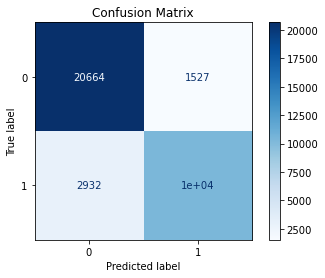

In [525]:

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Assuming you have your trained model 'rf' and your test data 'X_test' and 'y_test'

# Step 1: Make predictions
y_pred = grid_search.predict(X_test_selected)

# Step 2: Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Step 3: Visualize the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])  # 0 = not canceled, 1 = canceled
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()


In [532]:
# Identify misclassified samples
misclassified_indices = (y_test != y_pred)

# Print out the misclassified instances (features and their true/predicted labels)
misclassified_samples = X_test[misclassified_indices]
true_labels = y_test[misclassified_indices]
predicted_labels = y_pred[misclassified_indices]

# Display a few misclassified samples for inspection
for i in range(len(misclassified_samples)):
    print(f"Sample {i}:")
    print(f"Features: {misclassified_samples.iloc[i]}")
    print(f"True label: {true_labels.iloc[i]}")
    print(f"Predicted label: {predicted_labels[i]}")
    print("\n")


Sample 0:
Features: lead_time                        -0.014521
stays_in_weekend_nights             0.0625
stays_in_week_nights                  0.05
adults                                   2
children                                 0
babies                                   0
is_repeated_guest                        0
previous_cancellations                   0
previous_bookings_not_canceled           0
booking_changes                          0
adr                               0.581961
total_of_special_requests              0.2
incomplete_bookings                  False
no_stays                             False
reserved_room_type_encoded               3
assigned_room_type_encoded               3
arrival_season_encoded                   0
meal_FB                                  0
meal_HB                                  0
meal_SC                                  0
customer_type_Group                      0
customer_type_Transient                  1
customer_type_Transient-Party     

# 5. Feature Importance (10%)


---

Assess the importance of features within your decision tree model. Provide commentary on the reliability of your model's results based on the feature importance scores.

In [336]:
# <<< Your code here >>>
